# Regresión de una función tipo seno con Theano.

In [7]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


## Utilizando Theano crear un modelo que permita obtener el parámetro de una función de seno

In [8]:
import theano
import theano.tensor as T

#print theano.config.device
#print theano.config.floatX

## como la que se obtiene con las siguiente lineas de código:
- trX = np.linspace(-1, 1, 101)
- trY = np.linspace(-1, 1, 101)
- for i in range(len(trY)):
    - trY[i] = math.sin(0.5 \* trX[i]) + np.random.randn() \* 0.033

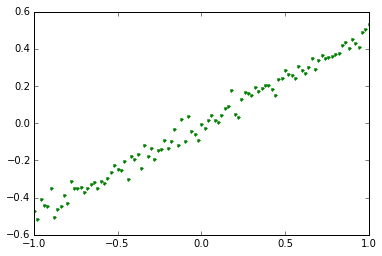

In [15]:
trX = np.linspace(-1, 1, 101)
trY = np.linspace(-1, 1, 101)
for i in range(len(trY)):
    trY[i] = math.sin(0.5 * trX[i]) + np.random.randn() * 0.033

plt.plot(trX, trY, 'g.')
plt.show()

### Construimos regresion mediante el modelo
- y =  w_0 + w_1\*sin(w_2\*X + w_3)

En el paso  0  el valor de w_0 es  -0.0692347051261  el valor de w_1 es  0.881124628475  el valor de w_2 es  0.901672581642  el valor de w_3 es  -0.0722193513848


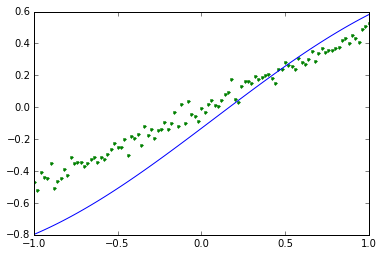

En el paso  2  el valor de w_0 es  -0.00576814006136  el valor de w_1 es  0.745415275335  el valor de w_2 es  0.796878504586  el valor de w_3 es  -0.0429966660245


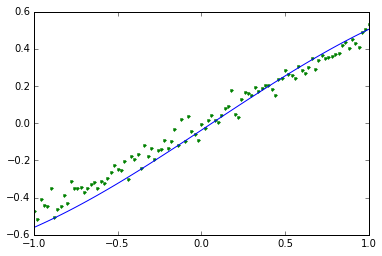

En el paso  4  el valor de w_0 es  0.0107561067947  el valor de w_1 es  0.708374971147  el valor de w_2 es  0.767416815367  el valor de w_3 es  -0.0360805606929


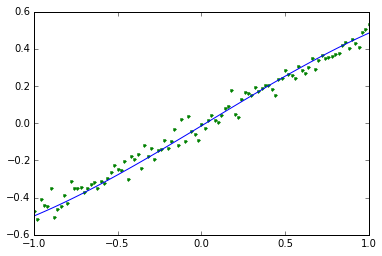

En el paso  6  el valor de w_0 es  0.0159239534772  el valor de w_1 es  0.69670495634  el valor de w_2 es  0.757876583037  el valor de w_3 es  -0.0342730474605


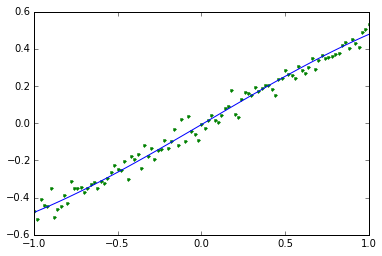

En el paso  8  el valor de w_0 es  0.0177572197008  el valor de w_1 es  0.692907861988  el valor de w_2 es  0.754550576892  el valor de w_3 es  -0.0338922088633


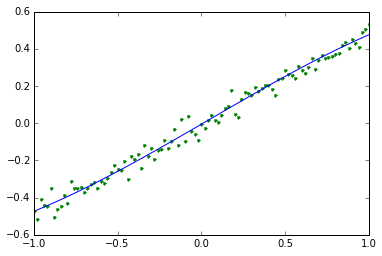

En el paso  10  el valor de w_0 es  0.0185056055663  el valor de w_1 es  0.691719339225  el valor de w_2 es  0.753286700032  el valor de w_3 es  -0.0339643903015


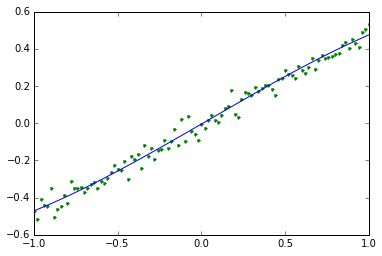

In [73]:
# Inicializamos X e Y
X = T.scalar()
Y = T.scalar()

# Definimos el modelo (y =  w_0 + w_1*sin(w_2*X + w_3))
def model(X, w_0, w_1, w_2, w_3):
    return w_0 + w_1*np.sin(w_2*X + w_3) 

# Inizializamos w_0 y w_1
w_0 = theano.shared(np.asarray(0., dtype = theano.config.floatX))
w_1 = theano.shared(np.asarray(1., dtype = theano.config.floatX))
w_2 = theano.shared(np.asarray(1., dtype = theano.config.floatX))
w_3 = theano.shared(np.asarray(0., dtype = theano.config.floatX))

# Calculamos y
y = model(X, w_0, w_1, w_2, w_3)

# Funcion de coste
cost     = T.mean(T.sqr(y - Y))

# Construimos el Gradiente Descendiente
gradient_0 = T.grad(cost = cost, wrt = w_0)
gradient_1 = T.grad(cost = cost, wrt = w_1)
gradient_2 = T.grad(cost = cost, wrt = w_2)
gradient_3 = T.grad(cost = cost, wrt = w_3)

# Actualizacion simultanea
updates  = [[w_0, w_0 - gradient_0 * 0.01], [w_1, w_1 - gradient_1 * 0.01], [w_2, w_2 - gradient_2 * 0.01],\
            [w_3, w_3 - gradient_3 * 0.01]]

# Entrenamos el modelo
train = theano.function(inputs = [X, Y], outputs = cost, updates = updates, allow_input_downcast = True)

# Ejecucion del Gradiente Descendiente
for i in range(11):    
    for x, y in zip(trX, trY):
        train(x, y)       

    if i%2 == 0:
        print 'En el paso ', i, ' el valor de w_0 es ', w_0.get_value(), ' el valor de w_1 es ', w_1.get_value(),\
              ' el valor de w_2 es ', w_2.get_value(), ' el valor de w_3 es ', w_3.get_value()
        
        # Plot results.
        plt.plot(trX, trY, 'g.')
        plt.plot(trX, model(trX, w_0.get_value(), w_1.get_value(), w_2.get_value(), w_3.get_value()))
        plt.show()